# 4. Overexpression targets

In [2]:
%run 1_Objective_function.ipynb

ASPtex ASPtex: asp__L_e <=> asp__L_p L-aspartate transport via diffusion (extracellular to periplasm)
EX_asp__L_e EX_asp__L_e: asp__L_e -->  L-Aspartate exchange
0.87699721425716
0.8769972144269869


To begin with, a FSEOF is ran to determine potential candidate reactions for overexpression. The highest the increase from row one to row 10 the highest the possitive effect over expression would have in Aspartate productivity. 

In [44]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target=model.reactions.EX_asp__L_e)
df = result.data_frame
print(df)


                    1          2          3          4          5          6   \
PPM          -0.800024  -0.781507  -0.762991  -0.744474  -0.725958  -0.707441   
ASPTA        -2.923250  -3.278808  -3.634366  -3.989924  -4.345482  -4.701040   
PYK           1.961931   1.648049   1.334166   1.020284   0.706401   0.392518   
ENO          15.623485  15.648072  15.672659  15.697247  15.721834  15.746421   
FBA           8.411815   8.371867   8.331919   8.291970   8.252022   8.212073   
PGL           2.526999   2.698633   2.870266   3.041899   3.213532   3.385166   
RPE           1.019806   1.149616   1.279427   1.409237   1.539047   1.668857   
TALA          0.673052   0.734181   0.795310   0.856439   0.917568   0.978697   
TKT1          0.673052   0.734181   0.795310   0.856439   0.917568   0.978697   
XYLI2         0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
PPC           2.951022   3.305937   3.660853   4.015768   4.370683   4.725598   
HEX7          0.000000   0.0

C:\Users\Valeria Stavila\AppData\Local\Temp\ipykernel_25496\894002828.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90, ha='center')


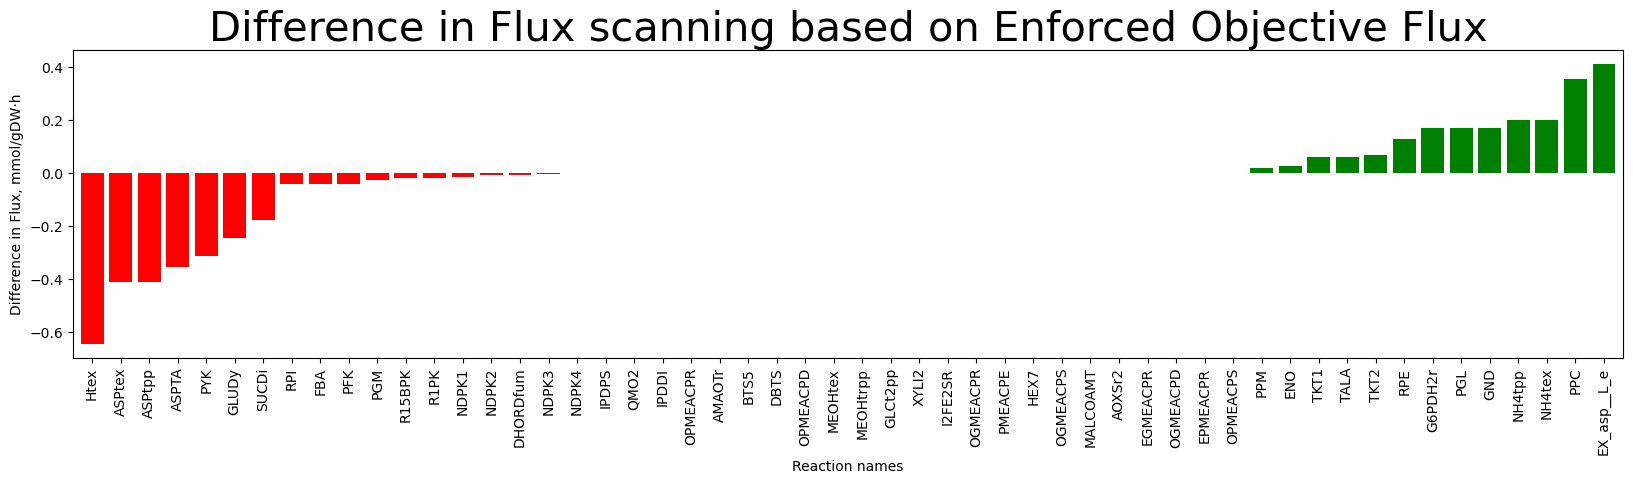

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the difference between the first and the last column
df['Difference'] = df.iloc[:, 10] - df.iloc[:, 0]

# Sort the DataFrame by the difference
df = df.sort_values(by='Difference', ascending=True)

def bar_color(df, color1, color2):
    return np.where(df.values >= 0, color1, color2)

fig, ax = plt.subplots(figsize=(20, 4))
bars = ax.bar(df.index, df['Difference'], color=bar_color(df['Difference'], 'green', 'red'))

ax.set_ylabel('Difference in Flux, mmol/gDW·h')
ax.set_xlabel('Reaction names')
ax.set_title('Difference in Flux scanning based on Enforced Objective Flux', size=30)

ax.set_xticklabels(df.index, rotation=90, ha='center')
ax.margins(x=0.005)
plt.show()

In [4]:
from cobra.flux_analysis import flux_variability_analysis

We then selected the 3 most relevant targets for over expression (PPC, NH4tpp and GND) some of which have been reported in the literature as ideal over-expression targets to increase aspartate production. 

# Analysis of the Overexpression candidates

**PPC:** Encondes for *phosphoenolpyruvate carboxylase* and when enhanced improves the supply of oxaloacetate one of the main precursors for *L-aspartate*. It has been studied and demostreted as a viable over expression target (Piao et al., 2019). 

**Nh4tpp:** Is a ammonia trnasport reaction. Amonia and fumaric acid can be catalized to produced L-aspartate by L-aspartase and therefore an increase in amonia availabilty would result in a higher concentration of the desired product (Shibatani, 1996).

**GND:** Encondes for *phosphogluconate dehydrogenase*, which is an enzyme that partakes in pyruvate production. pyruvate is eventualy converted into fumarate, a precursor for *L-aspartate* (Shimizu, 2013). 

First we would like to determine a base line for for the fluxes going to each reaction. 

In [13]:
with model:
    overexpress = [model.reactions.PPC, model.reactions.NH4tpp, model.reactions.GND, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = overexpress, fraction_of_optimum=0.9)
    print(fva)


              minimum    maximum
PPC          0.000000  26.742911
NH4tpp       8.494436  22.237429
GND          0.000000  31.820869
EX_asp__L_e  0.000000   1.886293


With the base line stablished we then give the reactions a higher lower bound to simulate the effect of overexpressing the corresponding genes and analises the change in flux. Every reaction was tested in every possible combination of single. double and triple target overexpression. 

In [14]:
with model:
    model.reactions.PPC.lower_bound = 5
    reactions_OE = [model.reactions.PPC, model.reactions.NH4tpp, model.reactions.GND, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = reactions_OE, fraction_of_optimum=0.9)
    print(fva)

             minimum    maximum
PPC          5.00000  27.609851
NH4tpp       8.45787  21.377785
GND          0.00000  32.253746
EX_asp__L_e  0.00000   1.911583


In [15]:
with model:
    model.reactions.NH4tpp.lower_bound = 15
    reactions_OE = [model.reactions.PPC, model.reactions.NH4tpp, model.reactions.GND, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = reactions_OE, fraction_of_optimum=0.9)
    print(fva)

             minimum    maximum
PPC              0.0  23.063884
NH4tpp          15.0  26.822286
GND              0.0  31.081851
EX_asp__L_e      0.0   1.880818


In [18]:
with model:
    model.reactions.GND.lower_bound = 5
    reactions_OE = [model.reactions.PPC, model.reactions.NH4tpp, model.reactions.GND, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = reactions_OE, fraction_of_optimum=0.9)
    print(fva)

              minimum    maximum
PPC          0.000000  24.930829
NH4tpp       8.482995  21.400519
GND          5.000000  31.977328
EX_asp__L_e  0.000000   1.845361


In [20]:
with model:
    model.reactions.PPC.lower_bound = 5
    model.reactions.NH4tpp.lower_bound = 15
    model.reactions.GND.lower_bound = 5
    reactions_OE = [model.reactions.PPC, model.reactions.NH4tpp, model.reactions.GND, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = reactions_OE, fraction_of_optimum=0.9)
    print(fva)

             minimum    maximum
PPC              5.0  24.480667
NH4tpp          15.0  26.131810
GND              5.0  32.782463
EX_asp__L_e      0.0   2.050596


In [19]:
with model:
    model.reactions.PPC.lower_bound = 5
    model.reactions.NH4tpp.lower_bound = 15
    reactions_OE = [model.reactions.PPC, model.reactions.NH4tpp, model.reactions.GND, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = reactions_OE, fraction_of_optimum=0.9)
    print(fva)

             minimum    maximum
PPC              5.0  24.712249
NH4tpp          15.0  26.264143
GND              0.0  31.576759
EX_asp__L_e      0.0   1.981854


In [21]:
with model:
    model.reactions.NH4tpp.lower_bound = 15
    model.reactions.GND.lower_bound = 5
    reactions_OE = [model.reactions.PPC, model.reactions.NH4tpp, model.reactions.GND, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = reactions_OE, fraction_of_optimum=0.9)
    print(fva)

             minimum    maximum
PPC              0.0  22.197591
NH4tpp          15.0  26.417524
GND              5.0  31.795025
EX_asp__L_e      0.0   1.902921


In [22]:
with model:
    model.reactions.PPC.lower_bound = 5
    model.reactions.GND.lower_bound = 5
    reactions_OE = [model.reactions.PPC, model.reactions.NH4tpp, model.reactions.GND, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = reactions_OE, fraction_of_optimum=0.9)
    print(fva)

              minimum    maximum
PPC          5.000000  27.105667
NH4tpp       8.391265  21.023075
GND          5.000000  33.231785
EX_asp__L_e  0.000000   1.964948


Literature based Overexpression targets were analysed to compare against the compurer detemrined targets. The targets where takne from a study conducted by (Piao et al., 2019). They both are related to the Aspartate synthesis metabolic pathway and their overexpression is ment to maximaze the flow of glucose towards aspartate production. 

In [12]:
with model:
    overexpress = [model.reactions.HEX1, model.reactions.PPCK, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = overexpress, fraction_of_optimum=0.9)
    print(fva)


             minimum    maximum
HEX1             0.0  31.550239
PPCK             0.0  24.050239
EX_asp__L_e      0.0   1.886293


In [16]:
with model:
    model.reactions.HEX1.lower_bound = 5
    model.reactions.PPCK.lower_bound = 5
    overexpress_lit= [model.reactions.HEX1, model.reactions.PPCK, model.reactions.EX_asp__L_e]
    fva = flux_variability_analysis(model, reaction_list = overexpress_lit, fraction_of_optimum=0.9)
    print(fva)

             minimum    maximum
HEX1             5.0  31.439000
PPCK             5.0  27.689000
EX_asp__L_e      0.0   1.779529


As we can see the over expression of these genes seems to have a negative impact in terms of Aspartate production. One explanation may be that in the study analysed the overexpression was coupled with several gene knock outs, meant to silence non favored products. The lower aspartate production may be due to those reactions staying intact and competing for substrate availability. In terms non paired modification strategies basing the over-expression solely on the results of the FSEOF is a viable strategy and may be a useful resource for early modification screaming. 

## References

Shimizu, K. (2013). Brief overview of metabolic regulation of a bacterial cell. In Elsevier eBooks (pp. 55–94). https://doi.org/10.1533/9781908818201.55

Piao, X., Wang, L., Lin, B., Chen, H., Liu, W., & Tao, Y. (2019). Metabolic engineering of Escherichia coli for production of L-aspartate and its derivative β-alanine with high stoichiometric yield. Metabolic Engineering, 54, 244–254. https://doi.org/10.1016/j.ymben.2019.04.012

Shibatani, T. (1996). Industrial application of immobilized biocatalysts in Japan. In Progress in Biotechnology (pp. 585–591). https://doi.org/10.1016/s0921-0423(96)80080-3
